In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [46]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [47]:
X_test.shape

(10000, 32, 32, 3)

In [48]:
y_test.shape

(10000, 1)

In [49]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [50]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train, y_test

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

In [51]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

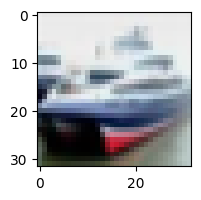

In [52]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[1])

In [53]:
# Normalize the dataset
X_train = X_train / 255
X_test = y_test / 255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [54]:
#CNN
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = 'softmax')

])

In [55]:
cnn.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [56]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-03-08 23:38:13.714758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 23:38:13.791304: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:38:13.791330: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:38:13.794335: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:38:13.794351: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:38:13.802954: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/76/pgpg1wqx1vjdlv7_ccm6_rs00000gn/T/ipykernel_3002/366738251.py", line 1, in <module>
      cnn.fit(X_train, y_train, epochs=10)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_6'
could not find registered platform with id: 0x11d87b420
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_6649]

In [38]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-03-08 23:32:13.569680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-08 23:32:13.885611: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:32:13.885636: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:32:14.023687: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:32:14.025697: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x11d87b420
2023-03-08 23:32:14.028734: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_4' defined at (most recent call last):
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/76/pgpg1wqx1vjdlv7_ccm6_rs00000gn/T/ipykernel_3002/2409442702.py", line 12, in <module>
      ann.fit(X_train, y_train, epochs=5)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/opt/anaconda3/envs/cifar10cnn/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_4'
could not find registered platform with id: 0x11d87b420
	 [[{{node StatefulPartitionedCall_4}}]] [Op:__inference_train_function_4212]